## Purpose

This notebook will analyze actual EEG recordings (non ADHD) and look into how slope affects ratio measures

In [1]:
# Set matplotlib for plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mne
import numpy as np

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.utils import trim_spectrum
from fooof.synth import gen_group_power_spectra, param_sampler, gen_power_spectrum

from utils.ratios import *

In [86]:
slopes = np.arange(.25,3,.25) # global scope - will be reset during each function call to not make things messy
theta_band = [4,8]
beta_band = [15,30]
alpha_band = [8,12]
f_range = [1, 100]

load in EEG data to MNE

In [126]:
data = mne.io.read_raw_cnt('./dat/cba/cba1ff01.cnt', mne.channels.read_montage("standard_1005"))
psds, freqs = mne.time_frequency.psd_welch(data)

  Could not parse meas date from the header. Setting to None.
The following EEG sensors did not have a position specified in the selected montage: ["T5'", "T6'", "O1'", "O2'", 'P3"', 'P4"', 'PZ"', 'I', 'CB1"', 'CB2"', 'CB1', 'CB2']. Their position has been left untouched.


<ipython-input-126-934f1e5dbd66>:1: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  data = mne.io.read_raw_cnt('./dat/cba/cba1ff01.cnt', mne.channels.read_montage("standard_1005"))
<ipython-input-126-934f1e5dbd66>:1: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ["T5'", "T6'", "O1'", "O2'", 'P3"', 'P4"', 'PZ"', 'I', 'CB1"', 'CB2"', 'CB1', 'CB2']. Their position has been left untouched.
  data = mne.io.read_raw_cnt('./dat/cba/cba1ff01.cnt', mne.channels.read_montage("standard_1005"))


Effective window size : 0.256 (s)


In [130]:
fg = FOOOFGroup(peak_width_limits=[.5, 7], min_peak_amplitude=.3,peak_threshold=1.65)
fg.fit(freqs,psds,f_range)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.91 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 98 Hz                        
                                 Frequency Resolution is 3.91 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):                               
                                         -10.0899, 1.6605                                         
                                                                                                  
                                       4 peaks were found:                                        
          

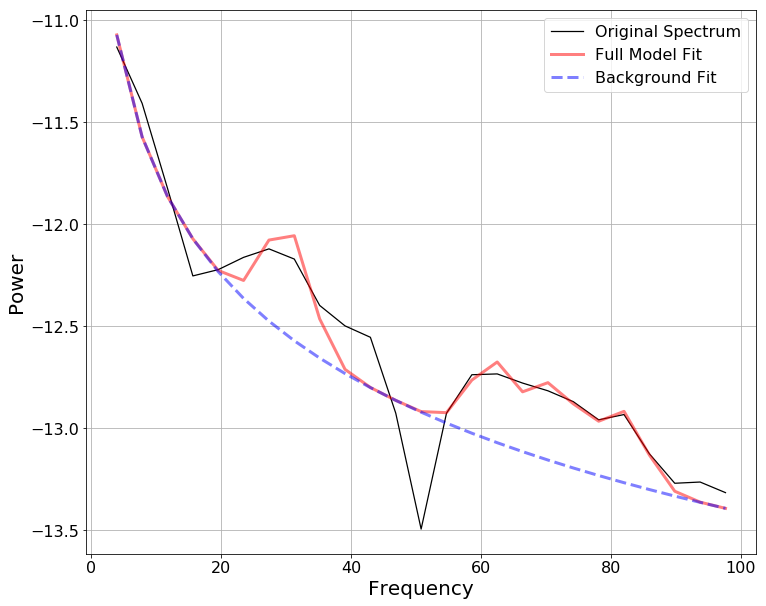

In [131]:
fm = fg.get_fooof(3,True)
fm.plot()
fm.print_results()

#### Theta/Beta

In [132]:
theta_beta_data = get_group_ratios(fg,theta_band,beta_band)

In [154]:
df_tb = pd.DataFrame(tb_averages).transpose()
df_tb.columns=["average_power","central_frequency", "power_density" ]

average_power_tb = df_tb.average_power.values
power_desity_tb = df_tb.power_density.values

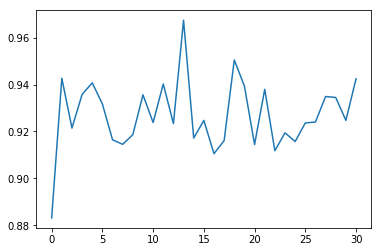

In [157]:
plt.plot(average_power_tb)

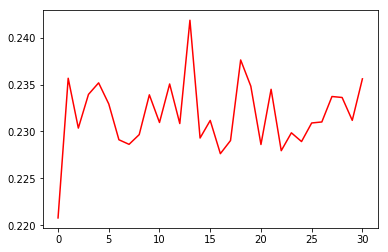

In [160]:
plt.plot(power_desity_tb,color='r')

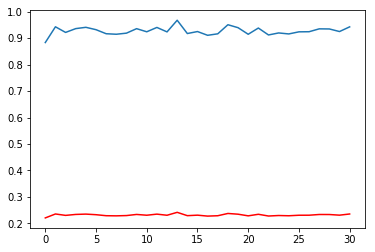

In [161]:
plt.plot(average_power_tb)
plt.plot(power_desity_tb,color='r')